# Topic Modeling

## Introduction

Another popular text analysis technique is called topic modeling. The ultimate goal of topic modeling is to find various topics that are present in your corpus. Each document in the corpus will be made up of at least one topic, if not multiple topics.

In this notebook, we will be covering the steps on how to do **Latent Dirichlet Allocation (LDA)**, which is one of many topic modeling techniques. It was specifically designed for text data.

To use a topic modeling technique, you need to provide (1) a document-term matrix and (2) the number of topics you would like the algorithm to pick up.

Once the topic modeling technique is applied, your job as a human is to interpret the results and see if the mix of words in each topic make sense. If they don't make sense, you can try changing up the number of topics, the terms in the document-term matrix, model parameters, or even try a different model.

## Topic Modeling - Attempt #1 (All Text)

In [5]:
%pip install numpy --upgrade 

  Using cached numpy-2.2.5-cp312-cp312-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.2.5-cp312-cp312-win_amd64.whl (12.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.5 which is incompatible.
scipy 1.12.0 requires numpy<1.29.0,>=1.22.4, but you have numpy 2.2.5 which is incompatible.


In [6]:
# Let's read in our document-term matrix
import pandas as pd
import pickle

cleaned_data = pd.read_pickle('data_clean.pkl')
data = pd.read_pickle('dtm_stop.pkl')
data

,aa,aaaaah,aaah,aah,aback,abbott,abc,abcs,ability,abject,...,zero,zillion,zingy,zipup,zombie,zombies,zoning,zoo,zoom,éclair
adam,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
ali,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
anthony,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bill,0,1,0,0,0,0,0,1,0,0,...,1,1,0,0,1,1,1,0,0,0
bo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dave,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dylan,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,2
hasan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
jamie,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
jim,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
data.to_csv('dtm_stop.csv')
cleaned_data.to_csv('data_clean.csv')

In [8]:
# Step 1: Reinstall numpy and scipy together at correct versions
%pip install numpy==1.26.4 scipy==1.12.0 --force-reinstall --no-cache-dir

# Step 2: RESTART RUNTIME (VERY IMPORTANT)


   ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
   - -------------------------------------- 0.5/15.5 MB 5.6 MB/s eta 0:00:03
   - -------------------------------------- 0.5/15.5 MB 5.6 MB/s eta 0:00:03
   -- ------------------------------------- 0.8/15.5 MB 985.5 kB/s eta 0:00:15
   ---- ----------------------------------- 1.8/15.5 MB 2.1 MB/s eta 0:00:07
   -------- ------------------------------- 3.1/15.5 MB 3.0 MB/s eta 0:00:05
   ---------- ----------------------------- 4.2/15.5 MB 3.4 MB/s eta 0:00:04
   ------------- -------------------------- 5.2/15.5 MB 3.6 MB/s eta 0:00:03
   ---------------- ----------------------- 6.3/15.5 MB 3.8 MB/s eta 0:00:03
   ------------------ --------------------- 7.3/15.5 MB 3.9 MB/s eta 0:00:03
   -------------------- ------------------- 8.1/15.5 MB 3.9 MB/s eta 0:00:02
   ----------------------- ---------------- 9.2/15.5 MB 4.0 MB/s eta 0:00:02
   -------------------------- ------------- 10.2/15.5 MB 4.2 MB/s eta 0:00:02
   

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [1]:
# Import the necessary modules for LDA with gensim
# Install gensim if not already installed
try:
    from gensim import matutils, models
except ModuleNotFoundError:
    %pip install gensim
    from gensim import matutils, models

import scipy.sparse
import pandas as pd
import pickle

# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [2]:
data = pd.read_csv('dtm_stop.csv')
data = data.set_index('Unnamed: 0')
data.index.names = [None]

In [3]:
data

,aa,aaaaah,aaah,aah,aback,abbott,abc,abcs,ability,abject,...,zero,zillion,zingy,zipup,zombie,zombies,zoning,zoo,zoom,éclair
adam,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
ali,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
anthony,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bill,0,1,0,0,0,0,0,1,0,0,...,1,1,0,0,1,1,1,0,0,0
bo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dave,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dylan,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,2
hasan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
jamie,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
jim,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# One of the required inputs is a term-document matrix
tdm = data.transpose()
tdm.head()

,adam,ali,anthony,bill,bo,dave,dylan,hasan,jamie,jim,joe,john,kelsey,kevin,louis,mike,ramy,ricky,sal,seth
aa,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
aaaaah,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
aaah,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
aah,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0
aback,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [5]:
# We're going to put the term-document matrix into a new gensim format, from df --> sparse matrix --> gensim corpus
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [6]:
# Gensim also requires dictionary of the all terms and their respective location in the term-document matrix
cv = pickle.load(open("cv_stop.pkl", "rb"))
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term), we need to specify two other parameters - the number of topics and the number of passes. Let's start the number of topics at 2, see if the results make sense, and increase the number from there.

In [7]:
# Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term),
# we need to specify two other parameters as well - the number of topics and the number of passes
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=2, passes=10)
lda.print_topics()

[(0,
  '0.005*"goes" + 0.004*"man" + 0.004*"look" + 0.004*"didnt" + 0.004*"did" + 0.004*"kids" + 0.004*"really" + 0.004*"theres" + 0.004*"love" + 0.004*"life"'),
 (1,
  '0.008*"fucking" + 0.005*"went" + 0.005*"little" + 0.004*"didnt" + 0.004*"guys" + 0.004*"goes" + 0.004*"man" + 0.004*"okay" + 0.004*"theres" + 0.003*"did"')]

In [8]:
# LDA for num_topics = 3
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=3, passes=10)
lda.print_topics()

[(0,
  '0.015*"fucking" + 0.008*"goes" + 0.007*"went" + 0.005*"thank" + 0.005*"love" + 0.004*"guy" + 0.004*"little" + 0.004*"man" + 0.004*"guys" + 0.004*"alright"'),
 (1,
  '0.005*"didnt" + 0.005*"theres" + 0.004*"did" + 0.004*"life" + 0.004*"man" + 0.004*"fucking" + 0.004*"really" + 0.004*"goes" + 0.004*"guy" + 0.004*"little"'),
 (2,
  '0.004*"didnt" + 0.004*"look" + 0.004*"man" + 0.004*"says" + 0.004*"did" + 0.004*"went" + 0.003*"things" + 0.003*"love" + 0.003*"little" + 0.003*"really"')]

In [9]:
# LDA for num_topics = 4
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=4, passes=10)
lda.print_topics()

[(0,
  '0.007*"fucking" + 0.005*"little" + 0.005*"didnt" + 0.005*"man" + 0.005*"thank" + 0.004*"look" + 0.004*"okay" + 0.004*"goes" + 0.004*"love" + 0.004*"went"'),
 (1,
  '0.006*"kids" + 0.005*"really" + 0.005*"life" + 0.005*"theres" + 0.004*"says" + 0.004*"way" + 0.004*"fcking" + 0.004*"mean" + 0.003*"man" + 0.003*"fck"'),
 (2,
  '0.010*"fucking" + 0.007*"didnt" + 0.005*"did" + 0.005*"man" + 0.004*"dude" + 0.004*"guy" + 0.004*"come" + 0.004*"make" + 0.004*"guys" + 0.004*"ahah"'),
 (3,
  '0.008*"goes" + 0.007*"fucking" + 0.006*"went" + 0.005*"theres" + 0.004*"shes" + 0.004*"did" + 0.004*"really" + 0.004*"ive" + 0.004*"gotta" + 0.003*"guy"')]

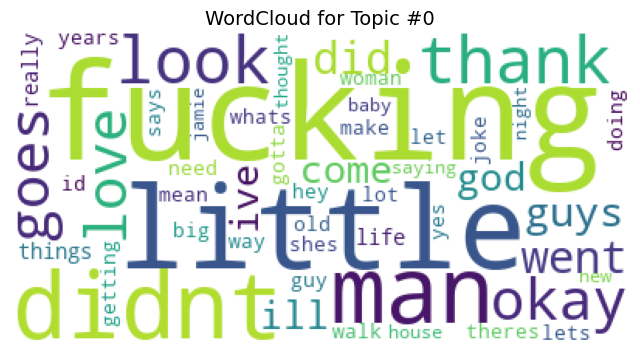

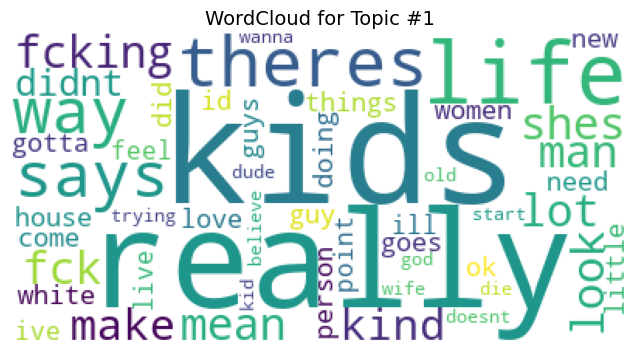

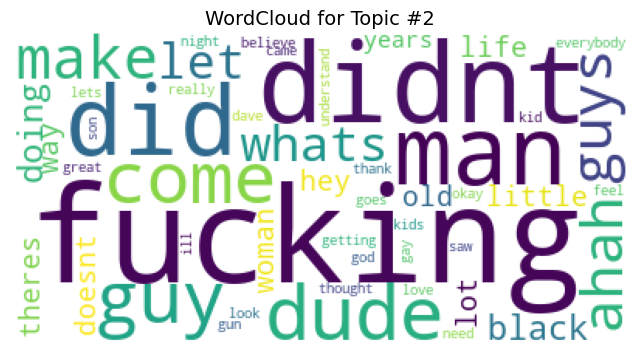

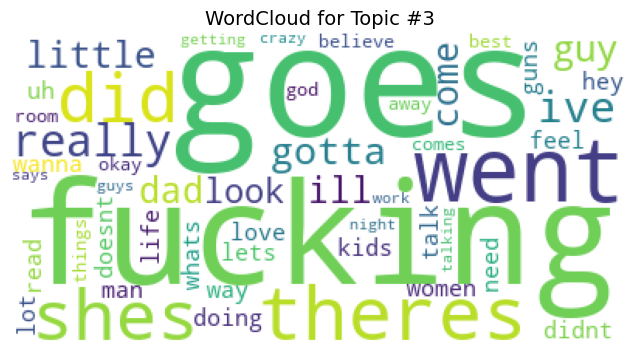

In [10]:
# Wordcloud for each topic
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Use ldana, the most recent model you trained
lda_model = lda

# OR any of the other models lda, ldan, ldana - depending on which one you want to visualize

for t in range(lda_model.num_topics):
    plt.figure(figsize=(8, 6))
    plt.imshow(WordCloud(background_color='white', colormap='viridis')
               .fit_words(dict(lda_model.show_topic(t, 50))))
    plt.axis("off")
    plt.title(f"WordCloud for Topic #{t}", fontsize=14)
    plt.show()

These topics aren't looking too great. We've tried modifying our parameters. Let's try modifying our terms list as well.

## Topic Modeling - Attempt #2 (Nouns Only)

One popular trick is to look only at terms that are from one part of speech (only nouns, only adjectives, etc.). Check out the UPenn tag set: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html.

In [11]:
# 1. Uninstall the broken version
%pip uninstall -y nltk

# 2. Install the correct stable version
%pip install nltk==3.8.1

# 3. Redownload the resources
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

Found existing installation: nltk 3.8.1
Uninstalling nltk-3.8.1:
  Successfully uninstalled nltk-3.8.1
Note: you may need to restart the kernel to use updated packages.
  Using cached nltk-3.8.1-py3-none-any.whl.metadata (2.8 kB)
Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
textblob 0.19.0 requires nltk>=3.9, but you have nltk 3.8.1 which is incompatible.
[nltk_data] Downloading package punkt to C:\Users\Mandar
[nltk_data]     Garud\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Mandar Garud\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [12]:
# 4. Then run your original code
import pandas as pd
from nltk import word_tokenize, pos_tag

In [13]:
def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)]
    return ' '.join(all_nouns)

# Apply the nouns function
data_clean = pd.read_pickle('data_clean.pkl')
data_nouns = pd.DataFrame(data_clean.transcript.apply(nouns))
data_nouns.head()

,transcript
adam,sandler love scraps skip search moviesmovie re...
ali,ali baby cobra transcript scraps skip search m...
anthony,anthony jeselnik thoughts prayers transcript s...
bill,bill sorry way transcript scraps skip search m...
bo,scraps skip search moviesmovie reviewsmovie tr...


In [14]:
# Read in the cleaned data, before the CountVectorizer step
data_clean = pd.read_pickle('data_clean.pkl')
data_clean

,transcript
adam,adam sandler love you transcript scraps fr...
ali,ali wong baby cobra transcript scraps from...
anthony,anthony jeselnik thoughts and prayers full ...
bill,bill burr im sorry you feel that way full t...
bo,scraps from the loft \t\tskip to content \t\t...
dave,dave chappelle the age of spin transcript ...
dylan,dylan moran yeah yeah transcript scraps fr...
hasan,scraps from the loft \t\tskip to content \t\t...
jamie,jamie foxx what had happened was transcript...
jim,jim jefferies bare full transcript scraps ...


In [15]:
# Apply the nouns function to the transcripts to filter only on nouns
data_clean = pd.read_pickle('data_clean.pkl')
data_nouns = pd.DataFrame(data_clean.transcript.apply(nouns))
data_nouns

,transcript
adam,sandler love scraps skip search moviesmovie re...
ali,ali baby cobra transcript scraps skip search m...
anthony,anthony jeselnik thoughts prayers transcript s...
bill,bill sorry way transcript scraps skip search m...
bo,scraps skip search moviesmovie reviewsmovie tr...
dave,chappelle age spin transcript scraps skip sear...
dylan,dylan transcript scraps skip search moviesmovi...
hasan,scraps skip search moviesmovie reviewsmovie tr...
jamie,jamie scraps skip search moviesmovie reviewsmo...
jim,jim jefferies transcript scraps skip search mo...


In [16]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Re-add the additional stop words and convert to a list
add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said']
stop_words = list(text.ENGLISH_STOP_WORDS.union(add_stop_words))

# Recreate a document-term matrix with only nouns
cvn = CountVectorizer(stop_words=stop_words)
data_cvn = cvn.fit_transform(data_nouns.transcript)
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names_out())
data_dtmn.index = data_nouns.index
data_dtmn


,aa,aah,aback,abc,abcs,ability,abortion,abortions,aboutin,absurd,...,zealand,zeppelin,zillion,zingy,zipup,zombie,zombies,zoo,zoom,éclair
adam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
ali,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
anthony,0,0,0,0,0,0,2,0,0,0,...,10,0,0,0,0,0,0,0,0,0
bill,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
bo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dave,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
dylan,0,0,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,2
hasan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
jamie,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
jim,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


C:\Users\Mandar Garud\AppData\Local\Temp\ipykernel_2148\1766119340.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Weight', y='Term', data=terms_df, palette='mako')


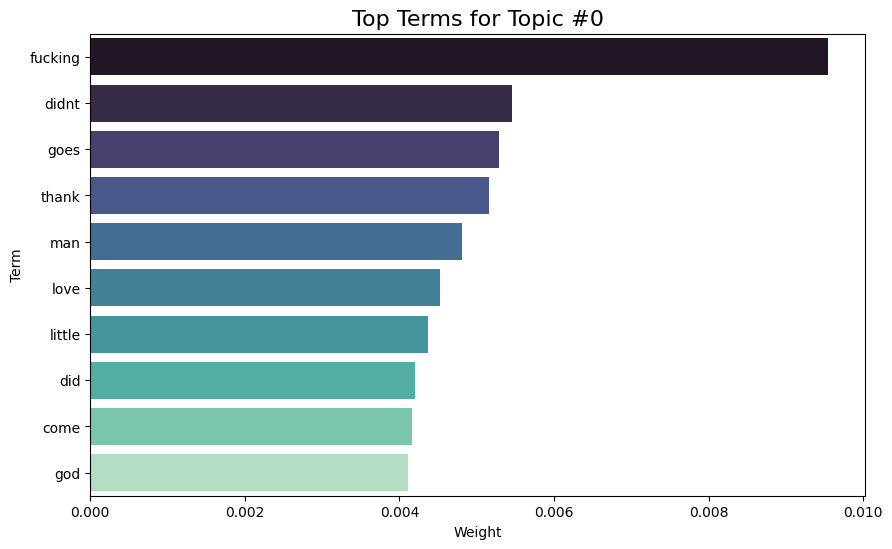

In [17]:
# Bar plot of top terms per topic
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # Make sure to import plt
from gensim import models

# For a specific topic
topic_num = 0  # Change topic number as needed

# Assign ldana to lda_model
lda_model = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=4, passes=10)

top_terms = dict(lda_model.show_topic(topic_num, topn=10))
terms_df = pd.DataFrame(top_terms.items(), columns=['Term', 'Weight'])

plt.figure(figsize=(10,6))
sns.barplot(x='Weight', y='Term', data=terms_df, palette='mako')
plt.title(f"Top Terms for Topic #{topic_num}", fontsize=16)
plt.xlabel("Weight")
plt.ylabel("Term")
plt.show()

In [18]:
# Create the gensim corpus
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

# Create the vocabulary dictionary
id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items())

In [19]:
# Let's start with 2 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=2, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.008*"thing" + 0.008*"life" + 0.008*"shit" + 0.007*"man" + 0.007*"hes" + 0.006*"guy" + 0.006*"gon" + 0.005*"fuck" + 0.005*"lot" + 0.005*"day"'),
 (1,
  '0.008*"thing" + 0.008*"day" + 0.008*"man" + 0.007*"cause" + 0.007*"kids" + 0.006*"way" + 0.006*"hes" + 0.005*"things" + 0.005*"shes" + 0.005*"life"')]

In [20]:
# Let's try topics = 3
ldan = models.LdaModel(corpus=corpusn, num_topics=3, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.010*"thing" + 0.009*"cause" + 0.008*"hes" + 0.008*"kids" + 0.007*"life" + 0.006*"day" + 0.006*"things" + 0.006*"lot" + 0.006*"way" + 0.006*"gon"'),
 (1,
  '0.010*"man" + 0.006*"shit" + 0.006*"god" + 0.006*"day" + 0.006*"thing" + 0.006*"way" + 0.005*"years" + 0.005*"fuck" + 0.005*"hes" + 0.005*"life"'),
 (2,
  '0.009*"shit" + 0.009*"thing" + 0.009*"man" + 0.008*"guy" + 0.008*"day" + 0.008*"gon" + 0.007*"fuck" + 0.007*"life" + 0.006*"hes" + 0.005*"fucking"')]

In [21]:
# Let's try 4 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=4, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.011*"shit" + 0.011*"man" + 0.008*"hes" + 0.008*"cause" + 0.008*"gon" + 0.007*"guy" + 0.007*"thing" + 0.007*"fuck" + 0.006*"life" + 0.006*"way"'),
 (1,
  '0.005*"lot" + 0.005*"feet" + 0.005*"women" + 0.004*"years" + 0.004*"life" + 0.004*"gon" + 0.004*"hair" + 0.003*"friends" + 0.003*"somebody" + 0.003*"guy"'),
 (2,
  '0.012*"thing" + 0.009*"day" + 0.008*"kids" + 0.008*"life" + 0.007*"things" + 0.007*"man" + 0.006*"hes" + 0.006*"way" + 0.006*"cause" + 0.005*"shes"'),
 (3,
  '0.012*"joke" + 0.009*"day" + 0.007*"anthony" + 0.006*"thing" + 0.005*"school" + 0.005*"family" + 0.005*"jokes" + 0.005*"grandma" + 0.004*"lot" + 0.004*"baby"')]

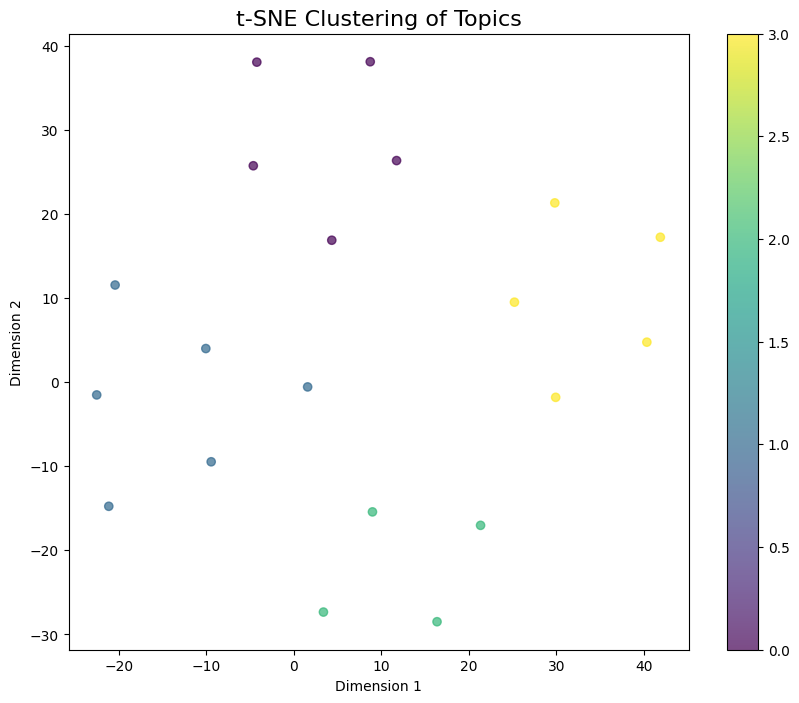

In [22]:
# t-SNE visualization of topic clusters
from sklearn.manifold import TSNE
import numpy as np

# Ensure you are using the correct corpus and model:
# lda_model should be the model trained on 'corpusna' and 'id2wordna'
# Replace lda_model with ldana if that was the intended model
lda_model = models.LdaModel(corpus=corpusn, id2word=id2word, num_topics=4, passes=10)

# Get document-topic distributions
topics_matrix = lda_model.get_document_topics(corpusn, minimum_probability=0)
topics_matrix = np.array([[tup[1] for tup in doc] for doc in topics_matrix])

# t-SNE
tsne_model = TSNE(n_components=2, random_state=42, perplexity=15) # Changed perplexity to 15
tsne_lda = tsne_model.fit_transform(topics_matrix)
plt.figure(figsize=(10, 8))
plt.scatter(tsne_lda[:, 0], tsne_lda[:, 1], c=np.argmax(topics_matrix, axis=1), cmap='viridis', alpha=0.7)
plt.colorbar()
plt.title("t-SNE Clustering of Topics", fontsize=16)
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

## Topic Modeling - Attempt #3 (Nouns and Adjectives)

In [23]:
# Let's create a function to pull out nouns from a string of text
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)]
    return ' '.join(nouns_adj)

In [24]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns_adj = pd.DataFrame(data_clean.transcript.apply(nouns_adj))
data_nouns_adj

,transcript
adam,sandler love scraps loft skip search moviesmov...
ali,ali wong baby cobra transcript scraps loft ski...
anthony,anthony jeselnik thoughts prayers full transcr...
bill,bill im sorry way full transcript scraps loft ...
bo,scraps loft skip search moviesmovie reviewsmov...
dave,chappelle age spin transcript scraps loft skip...
dylan,dylan yeah transcript scraps loft skip search ...
hasan,scraps loft skip search moviesmovie reviewsmov...
jamie,jamie transcript scraps loft skip search movie...
jim,jim jefferies full transcript scraps loft skip...


In [25]:
cvna = CountVectorizer(stop_words=stop_words, max_df=0.8)
data_cvna = cvna.fit_transform(data_nouns_adj.transcript)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names_out())
data_dtmna.index = data_nouns_adj.index
data_dtmna


,aa,aaaaah,aah,aback,abc,abcs,ability,abject,able,ablebodied,...,zealand,zeppelin,zillion,zingy,zipup,zombie,zombies,zoo,zoom,éclair
adam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
ali,0,0,0,0,1,0,0,0,2,0,...,0,0,0,0,0,1,0,0,0,0
anthony,0,0,0,0,0,0,0,0,0,0,...,10,0,0,0,0,0,0,0,0,0
bill,0,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,1,1,0,0,0
bo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dave,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dylan,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,2
hasan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
jamie,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
jim,0,0,0,0,0,0,0,0,1,2,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# Create the gensim corpus
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

In [27]:
# Let's start with 2 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=2, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.007*"shit" + 0.005*"kids" + 0.004*"kid" + 0.004*"women" + 0.004*"fuck" + 0.004*"everybody" + 0.003*"mom" + 0.003*"kind" + 0.003*"dad" + 0.003*"ta"'),
 (1,
  '0.008*"shit" + 0.007*"fuck" + 0.006*"kids" + 0.005*"fucking" + 0.004*"oh" + 0.004*"women" + 0.003*"black" + 0.003*"room" + 0.003*"wife" + 0.003*"okay"')]

In [28]:
# Let's try 3 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=3, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.008*"shit" + 0.007*"fuck" + 0.005*"black" + 0.005*"ta" + 0.005*"women" + 0.005*"dad" + 0.004*"oh" + 0.004*"kids" + 0.004*"jamie" + 0.004*"room"'),
 (1,
  '0.007*"kids" + 0.006*"shit" + 0.005*"kind" + 0.004*"women" + 0.004*"wife" + 0.004*"kid" + 0.003*"everybody" + 0.003*"fuck" + 0.003*"oh" + 0.003*"point"'),
 (2,
  '0.008*"shit" + 0.008*"fucking" + 0.006*"fuck" + 0.004*"ta" + 0.004*"baby" + 0.004*"balloons" + 0.004*"joke" + 0.004*"uh" + 0.004*"dick" + 0.003*"alright"')]

In [29]:
# Let's try 4 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.011*"shit" + 0.009*"kids" + 0.007*"fuck" + 0.007*"fucking" + 0.005*"wife" + 0.005*"kid" + 0.004*"dude" + 0.004*"women" + 0.004*"room" + 0.004*"dad"'),
 (1,
  '0.007*"jenny" + 0.007*"point" + 0.006*"kind" + 0.004*"sure" + 0.004*"accident" + 0.003*"phone" + 0.003*"scrambler" + 0.003*"uh" + 0.003*"friend" + 0.003*"school"'),
 (2,
  '0.008*"shit" + 0.007*"ta" + 0.007*"jamie" + 0.005*"fuck" + 0.005*"joke" + 0.005*"oh" + 0.005*"foxx" + 0.004*"black" + 0.004*"kids" + 0.004*"family"'),
 (3,
  '0.005*"women" + 0.004*"somebody" + 0.004*"men" + 0.004*"oh" + 0.003*"everybody" + 0.003*"okay" + 0.003*"feet" + 0.003*"kind" + 0.003*"phone" + 0.002*"fuck"')]

## Identify Topics in Each Document

Out of the 9 topic models we looked at, the nouns and adjectives, 4 topic one made the most sense. So let's pull that down here and run it through some more iterations to get more fine-tuned topics.

In [30]:
# Our final LDA model (for now)
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=80)
ldana.print_topics()

[(0,
  '0.010*"shit" + 0.006*"kind" + 0.005*"fuck" + 0.005*"women" + 0.004*"dude" + 0.004*"kids" + 0.004*"everybody" + 0.004*"kid" + 0.004*"oh" + 0.003*"jamie"'),
 (1,
  '0.005*"kids" + 0.005*"oh" + 0.004*"ta" + 0.004*"game" + 0.003*"feet" + 0.003*"lets" + 0.003*"dad" + 0.003*"women" + 0.003*"okay" + 0.003*"hair"'),
 (2,
  '0.011*"kids" + 0.006*"joke" + 0.006*"wife" + 0.005*"family" + 0.004*"anthony" + 0.004*"dad" + 0.004*"phone" + 0.004*"school" + 0.004*"room" + 0.004*"mom"'),
 (3,
  '0.010*"fucking" + 0.010*"fuck" + 0.009*"shit" + 0.005*"women" + 0.004*"room" + 0.004*"oh" + 0.004*"lets" + 0.004*"black" + 0.004*"ta" + 0.004*"kids"')]

These four topics look pretty decent. Let's settle on these for now.
* Topic 0: Social rants 
* Topic 1: Family humor 
* Topic 2: Parenting life 
* Topic 3: Edgy social commentary 

In [31]:
# Transform corpus
corpus_transformed = ldana[corpusna]

# Extract the dominant topic for each document
dominant_topics = [sorted(doc, key=lambda x: -x[1])[0][0] for doc in corpus_transformed]

# Pair the dominant topic with the transcript index
list(zip(dominant_topics, data_dtmna.index))


[(3, 'adam'),
 (0, 'ali'),
 (2, 'anthony'),
 (0, 'bill'),
 (1, 'bo'),
 (3, 'dave'),
 (0, 'dylan'),
 (1, 'hasan'),
 (0, 'jamie'),
 (3, 'jim'),
 (0, 'joe'),
 (0, 'john'),
 (1, 'kelsey'),
 (1, 'kevin'),
 (0, 'louis'),
 (0, 'mike'),
 (3, 'ramy'),
 (3, 'ricky'),
 (2, 'sal'),
 (2, 'seth')]

For a first pass of LDA, these kind of make sense to me, so we'll call it a day for now.
* Topic 0: Social rants [Ali, Bill, Dylan, Jamie, Joe, John, Louis, Mike]
* Topic 1: Family humor [Bo, Hasan, Kelsey, Kevin]
* Topic 2: Parenting life [Anthony, Sal, Seth]
* Topic 3: Edgy social commentary [Adam, Dave, Jim, Ramy, Ricky]

### Assignment:
1. Try further modifying the parameters of the topic models above and see if you can get better topics.
2. Create a new topic model that includes terms from a different [part of speech](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html) and see if you can get better topics.

In [32]:
# Block 1: Load libraries
from gensim.models import LdaModel, CoherenceModel
import matplotlib.pyplot as plt
from gensim.corpora import Dictionary
import spacy 

In [33]:
def build_lda_model(corpus, id2word, num_topics, passes, random_state=42):
    lda_model = LdaModel(
        corpus=corpus,
        id2word=id2word,
        num_topics=num_topics,
        passes=passes,
        random_state=random_state
    )
    return lda_model

In [34]:
def compute_coherence(lda_model, texts, dictionary):
    coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    return coherence_model.get_coherence()

In [35]:
texts = []
for doc in data_clean.transcript:
    tokens = [word for word in doc.lower().split()] 
    texts.append(tokens)

In [36]:
from gensim.corpora import Dictionary
id2word = Dictionary(texts)
corpus = [id2word.doc2bow(text) for text in texts]
lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=10)

In [37]:
num_topics_list = [5, 10, 15]
passes_list = [10, 15, 20]

best_score = 0
best_model = None

for num_topics in num_topics_list:
    for passes in passes_list:
        model = build_lda_model(corpus, id2word, num_topics=num_topics, passes=passes)
        coherence = compute_coherence(model, texts, id2word)
        print(f"Topics: {num_topics}, Passes: {passes} --> Coherence Score: {coherence:.4f}")
        
        if coherence > best_score:
            best_score = coherence
            best_model = model

print("\nBest Model Coherence Score:", best_score)

Topics: 5, Passes: 10 --> Coherence Score: 0.2261
Topics: 5, Passes: 15 --> Coherence Score: 0.2267
Topics: 5, Passes: 20 --> Coherence Score: 0.2280
Topics: 10, Passes: 10 --> Coherence Score: 0.2226
Topics: 10, Passes: 15 --> Coherence Score: 0.2226
Topics: 10, Passes: 20 --> Coherence Score: 0.2226
Topics: 15, Passes: 10 --> Coherence Score: 0.2499
Topics: 15, Passes: 15 --> Coherence Score: 0.2598
Topics: 15, Passes: 20 --> Coherence Score: 0.2598

Best Model Coherence Score: 0.2598115092615065


In [47]:
nlp = spacy.load('en_core_web_sm')
docs = [nlp(doc) for doc in data_clean.transcript]
texts = []
for doc in docs:
    tokens = [token.lemma_ for token in doc if token.pos_ == 'ADJ' and token.is_alpha and not token.is_stop]
    texts.append(tokens)

In [48]:
id2word = Dictionary(texts)
corpus = [id2word.doc2bow(text) for text in texts]
lda_model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    num_topics=10, 
    passes=15,      
    random_state=42
)
coherence_model = CoherenceModel(
    model=lda_model,
    texts=texts,
    dictionary=id2word,
    coherence='c_v'
)

In [49]:
coherence_score = coherence_model.get_coherence()
print(f"Coherence Score with Verbs: {coherence_score:.4f}")

Coherence Score with Verbs: 0.2340


In [50]:
topics = lda_model.print_topics()
for topic in topics:
    print(topic)

(0, '0.037*"fucking" + 0.034*"good" + 0.026*"little" + 0.026*"old" + 0.025*"right" + 0.024*"black" + 0.019*"great" + 0.017*"gay" + 0.013*"bad" + 0.013*"ill"')
(1, '0.001*"little" + 0.001*"good" + 0.001*"fucking" + 0.001*"old" + 0.001*"right" + 0.001*"big" + 0.001*"bad" + 0.001*"real" + 0.001*"ill" + 0.001*"sure"')
(2, '0.001*"good" + 0.001*"little" + 0.001*"right" + 0.001*"old" + 0.001*"great" + 0.001*"weird" + 0.001*"big" + 0.001*"crazy" + 0.001*"ill" + 0.001*"real"')
(3, '0.030*"good" + 0.017*"bad" + 0.016*"real" + 0.015*"crazy" + 0.015*"weird" + 0.014*"little" + 0.014*"old" + 0.013*"different" + 0.013*"new" + 0.013*"white"')
(4, '0.101*"fucking" + 0.065*"good" + 0.040*"ill" + 0.035*"little" + 0.028*"big" + 0.017*"great" + 0.015*"pink" + 0.015*"funny" + 0.013*"scary" + 0.011*"sorry"')
(5, '0.051*"good" + 0.029*"little" + 0.022*"bad" + 0.021*"old" + 0.018*"right" + 0.014*"ill" + 0.014*"great" + 0.013*"big" + 0.011*"wrong" + 0.010*"special"')
(6, '0.001*"good" + 0.001*"little" + 0.001*

In [ ]:
# Transform corpus
corpus_transformed = lda_model[corpus]

# Extract the dominant topic for each document
dominant_topics = [sorted(doc, key=lambda x: -x[1])[0][0] for doc in corpus_transformed]

# Pair the dominant topic with the transcript index
list(zip(dominant_topics, data_dtmna.index))